 **INFOSYS STOCK PREDICTION USING NEURAL NETWORK**

**In this case study, I will see how LSTMs can be used to learn the patterns in the stock prices and using this template you will be able to predict tomorrow’s price of a stock based on the last 10 days prices.**

In [1]:
import pandas as pd
import numpy as np


In [3]:
StockData=pd.read_csv("/content/drive/MyDrive/INFY.csv")
StockData.tail(25)

,Date,Open,High,Low,Close,Adj Close,Volume
5762,2022-11-25,19.830000,20.020000,19.780001,19.920000,19.920000,3161100
5763,2022-11-28,19.900000,19.959999,19.610001,19.629999,19.629999,4043200
5764,2022-11-29,19.719999,19.889999,19.670000,19.709999,19.709999,5516500
5765,2022-11-30,19.840000,20.360001,19.770000,20.350000,20.350000,6994600
5766,2022-12-01,20.400000,20.570000,20.250000,20.510000,20.510000,5586800
5767,2022-12-02,20.100000,20.290001,19.860001,20.190001,20.190001,5674600
5768,2022-12-05,20.040001,20.150000,19.590000,19.750000,19.750000,7650000
5769,2022-12-06,19.490000,19.580000,19.180000,19.410000,19.410000,11673400
5770,2022-12-07,19.350000,19.430000,19.230000,19.389999,19.389999,8087400
5771,2022-12-08,19.540001,19.820000,19.490000,19.580000,19.580000,6872000


**Visualizing the stock prices movement**

<Axes: xlabel='Date'>

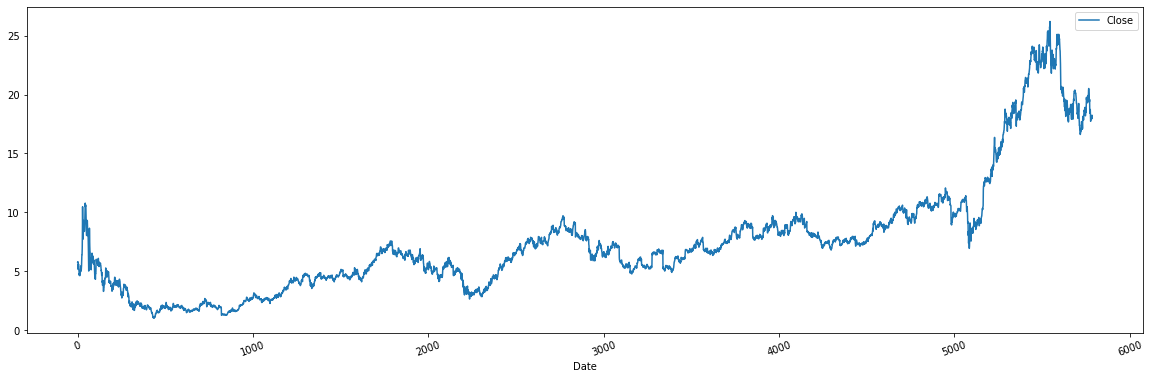

In [4]:
# Creating a column as date
StockData['Date']=StockData.index
 
# Plotting the stock prices
%matplotlib inline
StockData.plot(x='Date', y='Close', kind='line', figsize=(20,6), rot=20)

**Preparing the data:**

The LSTM model will need data input in the form of X Vs y. Where the X will represent the last 10 day’s prices and y will represent the 11th-day price.

Since LSTM is a Neural network-based algorithm, standardizing or normalizing the data is mandatory for a fast and more accurate fit.

In [5]:
# Extracting the closing prices of each day
FullData=StockData[['Close']].values
print(FullData[0:5])
 
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('After Normalization:')
X[0:5]

[[5.767578]
 [5.8125  ]
 [5.765625]
 [5.15625 ]
 [5.515625]]
After Normalization:


array([[0.18816272],
       [0.18994759],
       [0.18808512],
       [0.16387295],
       [0.17815192]])

**Preparing the data for LSTM:**

In [6]:
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\nInput Data shape:')
print(X_data.shape)

 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\nOutput Data shape:')
print(y_data.shape)


Input Data shape:
(5777, 10, 1)

Output Data shape:
(5777, 1)


**Splitting the data into training and testing:**

Keeping last few days of data to test the learnings of the model and rest for training the model.

Here I am choosing Last 5 days as testing.

In [7]:
# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
############################################
 
# Printing the shape of training and testing
print('Training Data shape:')
print(X_train.shape)
print(y_train.shape)
print('Testing Data shape:')
print(X_test.shape)
print(y_test.shape)

Training Data shape:
(5772, 10, 1)
(5772, 1)
Testing Data shape:
(5, 10, 1)
(5, 1)


**Visualizing the input and output data for LSTM:**

Printing some sample input and output values to help you visualize how the LSTM model will learn the prices.

You can see the input is a 3D array of the last 10 prices and the output is a 1D array of the next price.



In [8]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.18816272]
 [0.18994759]
 [0.18808512]
 [0.16387295]
 [0.17815192]
 [0.18125605]
 [0.16821872]
 [0.16449377]
 [0.15642305]
 [0.14408415]] -- [0.15037]
[[0.18994759]
 [0.18808512]
 [0.16387295]
 [0.17815192]
 [0.18125605]
 [0.16821872]
 [0.16449377]
 [0.15642305]
 [0.14408415]
 [0.15037   ]] -- [0.1475763]


**Creating the Deep Learning LSTM model:**

We have use the LSTM function instead of Dense to define the hidden layers. The output layer has one neuron as we are predicting the next day price, and if we want to predict for multiple days, then the input data and neurons will be changed and is equal to the number of days of forecast.

In [9]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In the below code snippet I have used three hidden LSTM layers and one output layer. One can choose more layers if we don’t get accuracy for the data. Similarly we can increase or decrease the number of neurons in the hidden layer.

Also, the more neurons and layers you use, the slower the model becomes. Because now there are many more computations to be done.
Each layer has some hyperparameters which needs to be tuned.

**Some of the important hyperparameters of LSTM are below:**

**1) units=10:**  we are creating a layer with ten neurons in it. Each of these five neurons will be receiving the values of inputs.

**2) input_shape** = (TimeSteps, TotalFeatures): The input expected by LSTM is in 3D format. Our training data has a shape of (5772, 10, 1) this is in the form of (number of samples, time steps, number of features). This means we have 5772 examples to learn in training data, each example looks back 10-steps in time like what was the stock price yesterday, the day before yesterday so on till last 10 days. This is known as Time steps. The last number ‘1’ represents the number of features. Here we are using just one column ‘Closing Stock Price’ hence its equal to ‘1’.

**3) kernel_initializer=’uniform’:** When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it like ‘normal’ or ‘glorot_uniform’.

**4) activation=’relu’**: This specifies the activation function for the calculations inside each neuron. You can choose values like ‘relu’, ‘tanh’, ‘sigmoid’, etc.

**5) return_sequences=True**: LSTMs backpropagate thru time, hence they return the values of the output from each time step to the next hidden layer. This keeps the expected input of the next hidden layer in the 3D format. This parameter is False for the last hidden layer because now it does not have to return a 3D output to the final Dense layer.

**6) optimizer=’adam’**: This parameter helps to find the optimum values of each weight in the neural network. ‘adam’ is one of the most useful optimizers, another one is ‘rmsprop’

**7) batch_size=10:** This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin and the neural network will start adjusting its weights based on the errors.
When all the rows are passed in the batches of 10 rows each as specified in this parameter, then we call that 1-epoch. Or one full data cycle. This is also known as mini-batch gradient descent. A small value of batch_size will make the LSTM look at the data slowly, like 2 rows at a time or 4 rows at a time which could lead to overfitting, as compared to a large value like 20 or 50 rows at a time, which will make the LSTM look at the data fast which could lead to underfitting. Hence a proper value must be chosen using hyperparameter tuning.

**8) Epochs=22**: The same activity of adjusting weights continues for 10 times, as specified by this parameter. In simple terms, the LSTM looks at the full training data 10 times and adjusts its weights.




In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = 1))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 22)
 
EndTime=time.time()
print("Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/22
1155/1155 [==============================] - 61s 44ms/step - loss: 0.0043
Epoch 2/22
1155/1155 [==============================] - 51s 44ms/step - loss: 3.7191e-04
Epoch 3/22
1155/1155 [==============================] - 52s 45ms/step - loss: 3.8628e-04
Epoch 4/22
1155/1155 [==============================] - 51s 45ms/step - loss: 3.4709e-04
Epoch 5/22
1155/1155 [==============================] - 52s 45ms/step - loss: 3.3028e-04
Epoch 6/22
1155/1155 [==============================] - 51s 45ms/step - loss: 2.8203e-04
Epoch 7/22
1155/1155 [==============================] - 52s 45ms/step - loss: 2.3806e-04
Epoch 8/22
1155/1155 [==============================] - 52s 45ms/step - loss: 2.0175e-04
Epoch 9/22
1155/1155 [==============================] - 52s 45ms/step - loss: 1.9164e-04
Epoch 10/22
1155/1155 [==============================] - 51s 45ms/step - loss: 1.8456e-04
Epoch 11/22
1155/1155 [==============================] - 52s 45ms/step - loss: 1.6956e-04
Epoch 12/22
1155/1155 [

In [11]:
regressor.save("model_10.h5")

**Measuring the accuracy of the model on testing data:**

Now using the trained model, we are checking if the predicted prices for the last 5 days are close to the actual prices or not.
 
Since we normalized the data before the model training, the predictions on testing data will also be normalized, hence the inverse transformation will bring the values to the original scale. Then only we must calculate the percentage accuracy.

1/1 [==============================] - 0s 438ms/step
Accuracy: 98.9633394619509


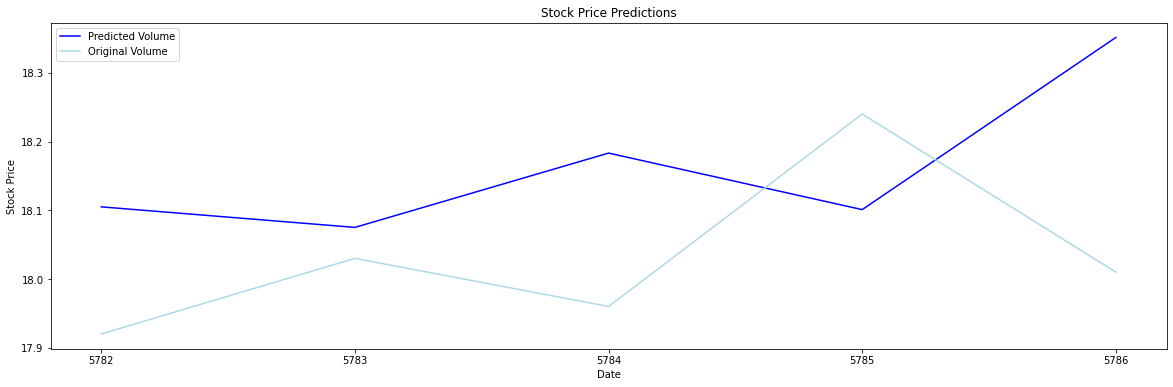

In [12]:

# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
 
# Visualising the results
import matplotlib.pyplot as plt
 
plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')
 
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['Date'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

**Visualizing the predictions for full data:**

Plotting the training and testing data both to see how good the LSTM model has fitted.

1/1 [==============================] - 0s 29ms/step


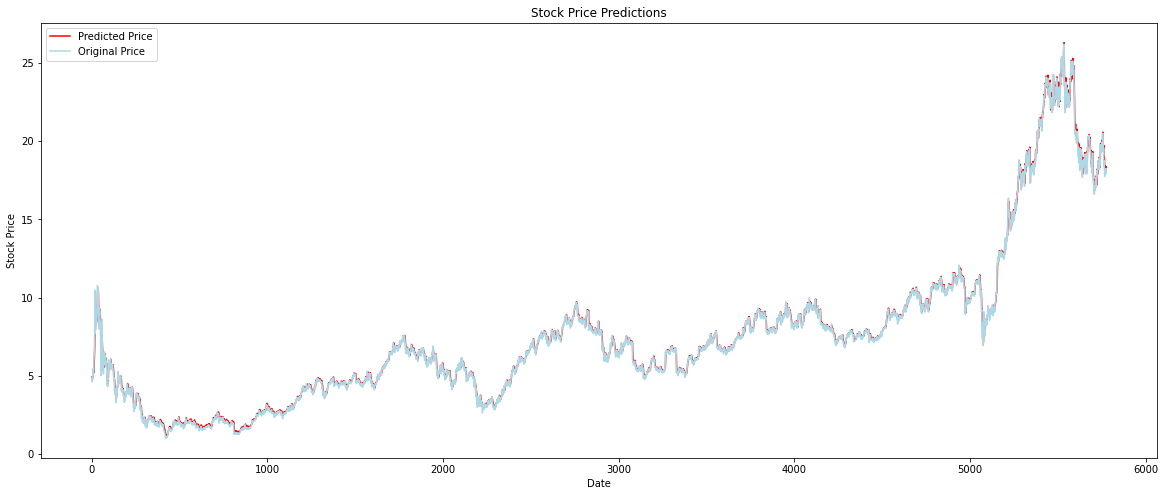

In [13]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]
 
# plotting the full data
plt.plot(FullDataPredictions, color = 'red', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

**How to predict the stock price for tomorrow:**

If we want to predict the price for tomorrow, all we need to do is to pass the last 10 day’s prices to the model in 3D format as it was used in the training.

The below snippet shows you how to take the last 10 prices manually and do a single prediction for the next price.

In [14]:
# Last 10 days prices
Last10Days=np.array([19.629999,19.709999,20.350000,20.510000,20.190001,19.750000,19.410000,19.389999,19.580000,18.490000])
 
# Normalizing the data just like we did for training the model
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)
 
#############################
 
# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 30ms/step


array([[18.568138]], dtype=float32)

**If I want to predict prices for the next 5 days:**

**Data Preparation for Multi Step LSTM:**

In [15]:
# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])
 
print('###################')
 
# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[17.73    ]
 [17.879999]
 [18.059999]
 [18.219999]
 [17.93    ]
 [17.92    ]
 [18.030001]
 [17.959999]
 [18.24    ]
 [18.01    ]]
###################
Scaled Prices
[0.66346318 0.66942306 0.67657497 0.68293221 0.67140974 0.67101241
 0.67538306 0.67260169 0.68372691 0.67458837]


In [16]:
# Multi step data preparation
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(5772, 10, 1)
### Output Data Shape ###
(5772, 5)


**Splitting the data into Training and Testing:**

In [17]:

# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(5767, 10, 1)
(5767, 5)

#### Testing Data shape ####
(5, 10, 1)
(5, 5)


**Visualizing the input->output sent to LSTM Multi-step model**

The input is a 3D array of the last 10 days’ prices and the output is an array of the next 5 days’ prices.

In [18]:
# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.18816272]
 [0.18994759]
 [0.18808512]
 [0.16387295]
 [0.17815192]
 [0.18125605]
 [0.16821872]
 [0.16449377]
 [0.15642305]
 [0.14408415]]
====>
[0.15037    0.1475763  0.1426097  0.14742111 0.15642305]
####################
[[0.18994759]
 [0.18808512]
 [0.16387295]
 [0.17815192]
 [0.18125605]
 [0.16821872]
 [0.16449377]
 [0.15642305]
 [0.14408415]
 [0.15037   ]]
====>
[0.1475763  0.1426097  0.14742111 0.15642305 0.15331892]
####################


**Creating the Deep Learning Multi-Step LSTM model**

Here we are using same configurations as used in the last model. The change is done at the Dense layer. Now the dense layer outputs the number of values equal to the FutureTimeSteps, which is 5 in this case since we want to predict the next 5 days.



In [19]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [24]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 50)
regressor.save("model_5.h5")
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/50
1154/1154 [==============================] - 56s 45ms/step - loss: 0.0163
Epoch 2/50
1154/1154 [==============================] - 52s 45ms/step - loss: 6.2205e-04
Epoch 3/50
1154/1154 [==============================] - 51s 44ms/step - loss: 5.2674e-04
Epoch 4/50
1154/1154 [==============================] - 52s 45ms/step - loss: 4.9721e-04
Epoch 5/50
1154/1154 [==============================] - 52s 45ms/step - loss: 4.8410e-04
Epoch 6/50
1154/1154 [==============================] - 52s 45ms/step - loss: 4.7292e-04
Epoch 7/50
1154/1154 [==============================] - 52s 45ms/step - loss: 4.5974e-04
Epoch 8/50
1154/1154 [==============================] - 52s 45ms/step - loss: 4.5155e-04
Epoch 9/50
1154/1154 [==============================] - 51s 45ms/step - loss: 4.4784e-04
Epoch 10/50
1154/1154 [==============================] - 52s 45ms/step - loss: 4.3924e-04
Epoch 11/50
1154/1154 [==============================] - 52s 45ms/step - loss: 4.1541e-04
Epoch 12/50
1154/1154 [

In [25]:
regressor.save("model_5.h5")

**Measuring the Accuracy of the model on testing data:**

Since this is Multi step model trained to predict next 5 days. Each prediction will generate 5 days’ prices which we can match with the original prices.

In [26]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 0s 418ms/step
#### Predicted Prices ####
[[17.822004 17.711658 17.541111 17.54656  17.46069 ]
 [17.381418 17.24875  17.119751 17.09472  17.032114]
 [17.569098 17.440865 17.438032 17.268232 17.282774]
 [17.77625  17.668072 17.648949 17.483889 17.490112]
 [17.934616 17.827856 17.783113 17.64443  17.635416]]

#### Original Prices ####
[[17.73     17.879999 18.059999 18.219999 17.93    ]
 [17.879999 18.059999 18.219999 17.93     17.92    ]
 [18.059999 18.219999 17.93     17.92     18.030001]
 [18.219999 17.93     17.92     18.030001 17.959999]
 [17.93     17.92     18.030001 17.959999 18.24    ]]


Each row represents the original prices and the predicted prices.

We will compare one row at a time. Using a simple for-loop, each row of original values are compared with the predicted values

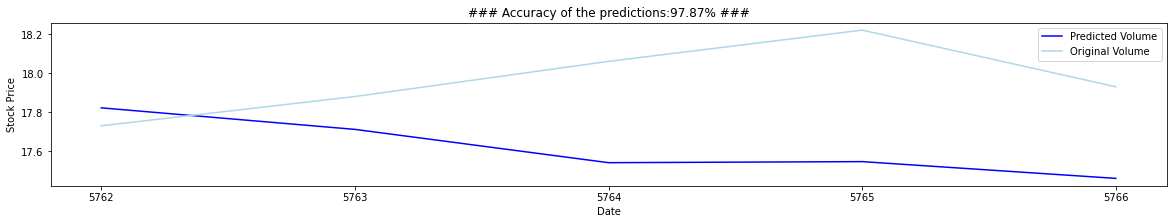

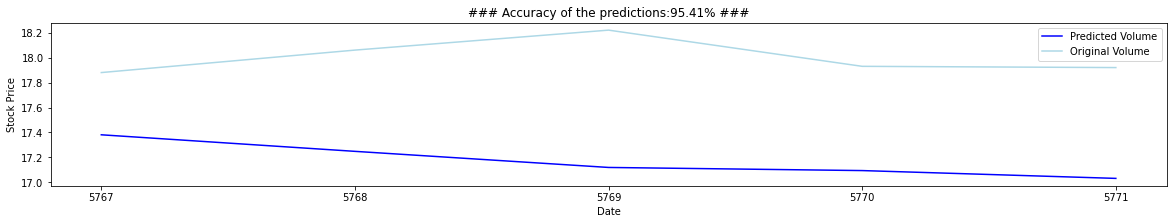

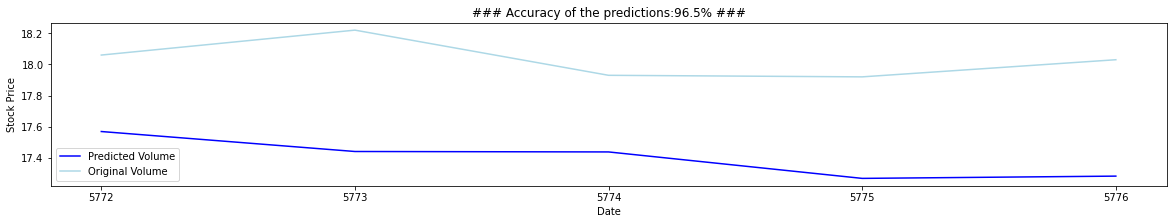

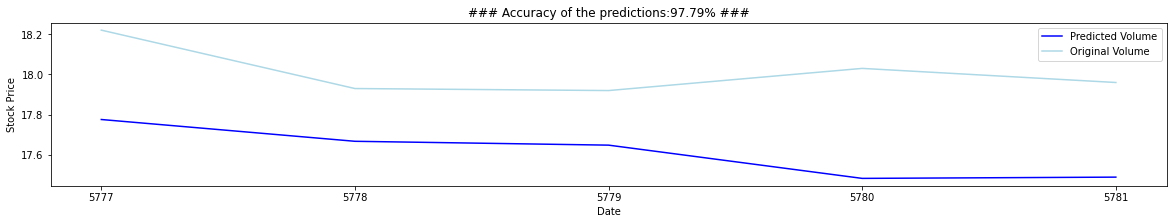

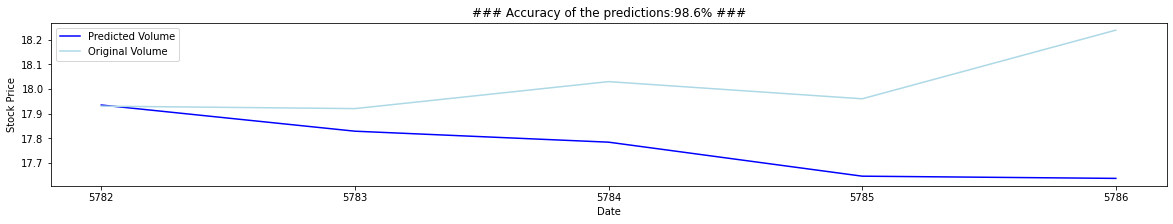

In [27]:

import matplotlib.pyplot as plt
 
for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]
    
    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'lightblue', label = 'Original Volume')
 
    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Date')
    
    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=StockData.shape[0]
 
    plt.xticks(range(FutureTimeSteps), StockData.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['Date'])
    plt.ylabel('Stock Price')
 
    plt.legend()
    fig=plt.gcf()
    fig.set_figwidth(20)
    fig.set_figheight(3)
    plt.show()

**Making predictions for the next 5 days:**

If you want to predict the price for the next 5 days, all you have to do is to pass the last 10 day’s prices to the model in 3D format as it was used in the training.

The below snippet shows you how to pass the last 10 values manually to get the next 5 days’ price predictions.





In [28]:
# Making predictions on test data
Last10DaysPrices=np.array([18.49,18.41,18.73,18.71,18.17,17.73,17.87,18.05,18.21,17.93])
 
# Reshaping the data to (-1,1 )because its a single entry
Last10DaysPrices=Last10DaysPrices.reshape(-1, 1)
 
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(Last10DaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next5DaysPrice = regressor.predict(X_test)
 
# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 [==============================] - 0s 30ms/step


array([[17.611809, 17.495089, 17.37598 , 17.331787, 17.267681]],
      dtype=float32)